In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# let's load the data and see what it looks like

df = pd.read_csv('dataset_glassdoor-jobs-scraper_2022-02-04.csv')

df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [3]:
# here are how many instances we have  

len(df)

672

In [4]:
#removing the k and $
salary=df['Salary Estimate']
without_kd=salary.apply(lambda x:x.replace('K',' ').replace('$',' ').replace(' (Glassdoor est.)',' ').replace(' (Employer est.)',' '))
without_kd

0       137 - 171  
1       137 - 171  
2       137 - 171  
3       137 - 171  
4       137 - 171  
           ...     
667     105 - 167  
668     105 - 167  
669     105 - 167  
670     105 - 167  
671     105 - 167  
Name: Salary Estimate, Length: 672, dtype: object

In [5]:
#making a min column column and changing type to int (wanted to have a space instead of _ but it interferes with avg)
df['Min_Salary']=without_kd.apply(lambda x:x.split('-')[0])
df['Min_Salary']=df['Min_Salary'].astype('int')
df['Min_Salary']

0      137
1      137
2      137
3      137
4      137
      ... 
667    105
668    105
669    105
670    105
671    105
Name: Min_Salary, Length: 672, dtype: int32

In [6]:
#making a max column and changing type to int
df['Max_Salary']=without_kd.apply(lambda x:x.split('-')[1])
df['Max_Salary']=df['Max_Salary'].astype('int')
df['Max_Salary']

0      171
1      171
2      171
3      171
4      171
      ... 
667    167
668    167
669    167
670    167
671    167
Name: Max_Salary, Length: 672, dtype: int32

In [7]:
#making an avg column
df['Avg Salary']=(df.Min_Salary+df.Max_Salary)/2
df['Avg Salary']

0      154.0
1      154.0
2      154.0
3      154.0
4      154.0
       ...  
667    136.0
668    136.0
669    136.0
670    136.0
671    136.0
Name: Avg Salary, Length: 672, dtype: float64

In [8]:
# remove rating from Company Name
df['Rating']=df['Rating'].astype('float')
df['Company Name']=df.apply(lambda x:x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4],axis=1)

df['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: object

In [9]:
df['Rating']

0      3.1
1      4.2
2      3.8
3      3.5
4      2.9
      ... 
667    3.6
668   -1.0
669   -1.0
670    5.0
671    2.7
Name: Rating, Length: 672, dtype: float64

In [10]:
#finding the avg of ratings without the -1's and inserting it where they are
ratingNoMinus=df[df['Rating']>0]
ratingNoMinus=ratingNoMinus['Rating']
ratingNoMinusAvg=(ratingNoMinus.sum()/len(ratingNoMinus))
ratingNoMinusAvg=((ratingNoMinusAvg*10).astype('int')/10)
df['Rating']=df['Rating'].apply(lambda x:ratingNoMinusAvg if x<0 else x)
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Avg Salary
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,105,167,136.0
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,3.8,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,105,167,136.0
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,3.8,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,105,167,136.0
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,105,167,136.0


In [11]:
# add column for length of job description

# get average size of company (min, max, avg)


In [12]:
# create a column for State, so we can simplify the location

df['State'] = df.apply(lambda x: 'Remote' if x['Location'].find(',') == -1  else x['Location'].split(',')[1],axis=1)
df['State']

0       NY
1       VA
2       MA
3       MA
4       NY
      ... 
667     NJ
668     CA
669     CA
670     CA
671     NY
Name: State, Length: 672, dtype: object

In [13]:
# create a column that checks if a job offer is in headquarters or not

df['Is_Headquarters']=df.apply(lambda x:'No' if x['Headquarters']=='-1' else x['Headquarters'],axis=1)
df['Is_Headquarters']=df.apply(lambda x:'No' if x['Headquarters']!=x['Is_Headquarters'] else 'Yes',axis=1)

df['Is_Headquarters']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
667    Yes
668     No
669     No
670    Yes
671    Yes
Name: Is_Headquarters, Length: 672, dtype: object

In [14]:
# age of company 

df['Age of Company'] = df.Founded.apply(lambda x: x if x<0 else 2022-x)

df['Age of Company']

0      29
1      54
2      41
3      22
4      24
       ..
667    33
668    -1
669    -1
670    -1
671    46
Name: Age of Company, Length: 672, dtype: int64

In [15]:
# create new columns relating to job description 

# a column if Python is involved in job
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# a column if Spark is involved in job
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# a column if AWS is involved in job
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# a column if Excel is involved in job
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# a column on length of job description

In [16]:
# simplify job titles into distinct categories (new column)

# since this is a little more complex, we wrote a function that elaborates
def job_categories(position):
    if 'data scientist' in position.lower():
        return 'Data Scientist'
    elif 'analyst' in position.lower() or 'analysis' in position.lower() or 'statistic' in position.lower():
        return 'Data Analyst'
    elif 'data engineer' in position.lower():
        return 'Data Engineer'
    elif 'software engineer' in position.lower():
        return 'Software Engineer'
    elif 'machine learning' in position.lower() or 'ml' in position.lower():
        return "Machine Learning Engineer"
    
    elif 'engineer' in position.lower():
        return 'Other Engineer'

    elif 'director' in position.lower():
        return 'Director'
    elif 'manager' in position.lower():
        return 'Manager'
    else:
        return 'Other'
    
df['Job Categories'] = df['Job Title'].apply(job_categories)

In [17]:
df['Job Categories'].value_counts()

Data Scientist               455
Data Analyst                  57
Data Engineer                 47
Other                         46
Machine Learning Engineer     35
Other Engineer                16
Manager                        7
Software Engineer              6
Director                       3
Name: Job Categories, dtype: int64

In [18]:
def seniority(position):
    if 'senior' in position.lower() or 'sr' in position.lower() or 'lead' in position.lower() or 'principal' in position.lower():
        return "Senior"
    elif 'junior' in position.lower() or 'jr' in position.lower():
        return "Junior"
    else:
        return 'NA'
    
df['Seniority'] = df['Job Title'].apply(seniority)

In [19]:
df['Seniority'].value_counts()

NA        576
Senior     94
Junior      2
Name: Seniority, dtype: int64

In [20]:
df['State'].value_counts()

 CA       165
 VA        89
 MA        62
 NY        52
 MD        40
 IL        30
 DC        26
Remote     22
 TX        17
 WA        16
 OH        14
 PA        12
 MO        12
 NJ        10
 CO        10
 GA         9
 NC         9
 FL         8
 TN         8
 WI         6
 OK         6
 MI         5
 IN         5
 MN         4
 AL         4
 UT         4
 CT         4
 AZ         4
 IA         3
 NE         3
 NH         2
 OR         2
 RI         2
 SC         2
 DE         1
 LA         1
 MS         1
 KS         1
 WV         1
Name: State, dtype: int64

In [44]:
#df['Description Length Original']=df['Job Description'].apply(lambda x:len(x))

# note: I made it length per word instead of how many characters used, which do you think is better?

df['Description_Length']=df['Job Description'].apply(lambda x: len(x.split(' ')))

df['Description_Length']

0       441
1       515
2      1202
3       430
4       358
       ... 
667     526
668     156
669     361
670     455
671     394
Name: Description_Length, Length: 672, dtype: int64

In [35]:
df['Competitor Count']=df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)
df['Competitor Count']

0      3
1      0
2      0
3      3
4      3
      ..
667    0
668    0
669    0
670    0
671    0
Name: Competitor Count, Length: 672, dtype: int64

In [36]:
# we should probably save the file as a cleaned file at this point?

In [37]:
# some data analyzation

In [38]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_Salary', 'Max_Salary', 'Avg Salary', 'State', 'Is_Headquarters',
       'Age of Company', 'Python', 'Spark', 'AWS', 'Excel', 'Job Categories',
       'Seniority', 'Description Length', 'lol', 'Competitor Count'],
      dtype='object')

In [39]:
df.describe()

,index,Rating,Founded,Min_Salary,Max_Salary,Avg Salary,Age of Company,Python,Spark,AWS,Excel,Description Length,lol,Competitor Count
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,335.500000,3.875744,1635.529762,99.196429,148.130952,123.663690,31.065476,0.730655,0.281250,0.258929,0.440476,465.071429,465.071429,0.700893
std,194.133974,0.588001,756.746640,33.009958,48.035110,39.580268,39.766853,0.443950,0.449944,0.438373,0.496814,224.199947,224.199947,1.227407
min,0.000000,2.000000,-1.000000,31.000000,56.000000,43.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,0.000000
25%,167.750000,3.500000,1917.750000,79.000000,119.000000,103.000000,7.000000,0.000000,0.000000,0.000000,0.000000,316.000000,316.000000,0.000000
50%,335.500000,3.800000,1995.000000,91.000000,133.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,448.000000,448.000000,0.000000
75%,503.250000,4.300000,2009.000000,122.000000,165.000000,136.500000,39.000000,1.000000,1.000000,1.000000,1.000000,597.000000,597.000000,1.000000
max,671.000000,5.000000,2019.000000,212.000000,331.000000,271.500000,241.000000,1.000000,1.000000,1.000000,1.000000,1543.000000,1543.000000,3.000000


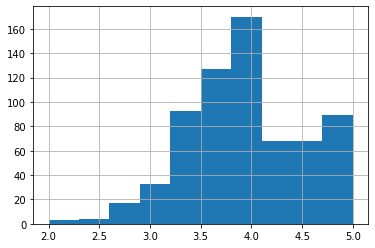

In [40]:
df.Rating.hist()

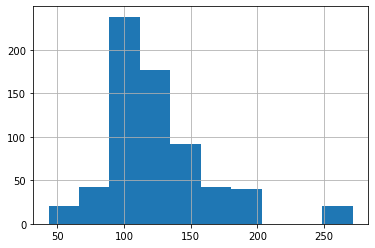

In [41]:
df['Avg Salary'].hist()

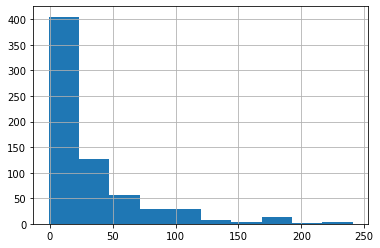

In [42]:
df['Age of Company'].hist()

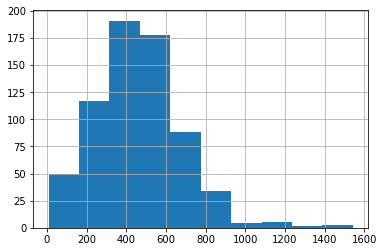

In [45]:
df.Description_Length.hist()

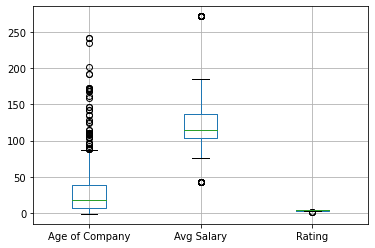

In [46]:
df.boxplot(column=['Age of Company','Avg Salary','Rating'])

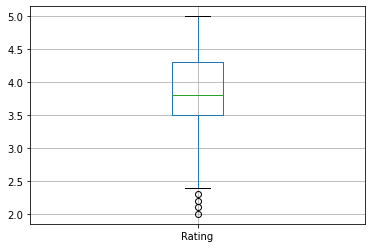

In [47]:
df.boxplot(column=['Rating'])